# Imports & Configs

In [1]:
# %pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE, SelectFromModel
import itertools
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import os
import glob
from tqdm import tqdm
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [3]:
# folder_path = 'C:\\Users\\thsak\\Desktop\\IDS\\CICIoT2023\\'

In [4]:
# file_paths = glob.glob(folder_path + '/*.csv')

In [5]:
# train = pd.DataFrame()

In [6]:
# n_file_limit = 1
# for file_path in tqdm(file_paths, desc='Processing files', unit='file'):
#     if n_file_limit <= 0: break
#     n_file_limit -= 1
#     df = pd.read_csv(file_path)
#     train = pd.concat([train, df], ignore_index=True)

# Data Preprocessing & EDA

In [7]:
train = pd.read_csv("C:\\Users\\thsak\\Desktop\\IDS\\CICIoT2023\\part-00113-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,102.20,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315011e+07,9.5,9.165151,0.00000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334862e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.308927e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SYN_Flood
3,3.394034,210.60,6.00,64.00,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336215e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.00,6.00,64.00,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334381e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,17.00,64.00,8775.835347,8775.835347,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310664e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
451494,4.749410,108.00,6.00,64.00,0.421105,0.421105,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.295157e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DoS-TCP_Flood
451495,0.006198,2.96,1.04,72.91,5.956262,5.956262,0.0,0.0,0.0,0.0,...,0.401681,42.5,8.314935e+07,9.5,9.179101,0.57063,3.258608,0.05,141.55,DDoS-ICMP_Flood
451496,0.086669,38225.00,17.00,64.00,8818.813708,8818.813708,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310246e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451498 entries, 0 to 451497
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    451498 non-null  float64
 1   Header_Length    451498 non-null  float64
 2   Protocol Type    451498 non-null  float64
 3   Duration         451498 non-null  float64
 4   Rate             451498 non-null  float64
 5   Srate            451498 non-null  float64
 6   Drate            451498 non-null  float64
 7   fin_flag_number  451498 non-null  float64
 8   syn_flag_number  451498 non-null  float64
 9   rst_flag_number  451498 non-null  float64
 10  psh_flag_number  451498 non-null  float64
 11  ack_flag_number  451498 non-null  float64
 12  ece_flag_number  451498 non-null  float64
 13  cwr_flag_number  451498 non-null  float64
 14  ack_count        451498 non-null  float64
 15  syn_count        451498 non-null  float64
 16  fin_count        451498 non-null  floa

In [9]:
train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,102.2,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.0,42.0,8.315011e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334862e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-RSTFINFlood
2,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,54.0,8.308927e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-SYN_Flood
3,3.394034,210.6,6.0,64.0,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336215e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.0,6.0,64.0,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334381e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-RSTFINFlood


In [10]:
train.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,451498.000000,4.514980e+05,451498.000000,451498.000000,4.514980e+05,4.514980e+05,451498.000000,451498.000000,451498.000000,451498.000000,...,451498.000000,451498.000000,451498.000000,4.514980e+05,451498.000000,451498.000000,451498.000000,4.514980e+05,451498.000000,451498.000000
mean,5.715186,7.704312e+04,9.072565,66.337599,9.467058e+03,9.467058e+03,0.000004,0.086344,0.206459,0.090277,...,124.876302,33.381340,124.983505,8.321214e+07,9.499878,13.132842,47.174271,3.085566e+04,0.096250,141.548302
std,260.774301,4.635026e+05,8.966066,13.931429,1.033561e+05,1.033561e+05,0.001329,0.280871,0.404764,0.286579,...,240.858298,160.906349,241.765667,1.704557e+07,0.818956,8.635086,227.590850,3.226507e+05,0.232888,21.063844
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.091460e+00,2.091460e+00,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.307157e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.571264e+01,1.571264e+01,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312453e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.105739,2.877100e+02,14.440000,64.000000,1.184370e+02,1.184370e+02,0.000000,0.000000,0.000000,0.000000,...,54.050113,0.366319,54.060000,8.334400e+07,9.500000,10.396725,0.505921,1.313486e+00,0.080000,141.550000
max,64016.004351,9.785469e+06,47.000000,255.000000,7.340032e+06,7.340032e+06,0.871689,1.000000,1.000000,1.000000,...,8201.774853,7139.980170,8754.000000,1.676394e+08,15.000000,128.078251,10120.787946,5.132515e+07,1.000000,244.600000


In [11]:
train.describe(include='object')

,label
count,451498
unique,34
top,DDoS-ICMP_Flood
freq,69891


## Missing Data

In [12]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [13]:
#Drop rown with NaN values
train = train.dropna()

# To reset the indices
train = train.reset_index(drop=True)

# Print the dataframe
train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,102.20,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315011e+07,9.5,9.165151,0.00000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334862e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.308927e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SYN_Flood
3,3.394034,210.60,6.00,64.00,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336215e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.00,6.00,64.00,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334381e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,17.00,64.00,8775.835347,8775.835347,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310664e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
451494,4.749410,108.00,6.00,64.00,0.421105,0.421105,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.295157e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DoS-TCP_Flood
451495,0.006198,2.96,1.04,72.91,5.956262,5.956262,0.0,0.0,0.0,0.0,...,0.401681,42.5,8.314935e+07,9.5,9.179101,0.57063,3.258608,0.05,141.55,DDoS-ICMP_Flood
451496,0.086669,38225.00,17.00,64.00,8818.813708,8818.813708,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310246e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood


No missing values

## Duplicates

In [14]:
train.drop_duplicates()
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


## Outliers

In [15]:
# for col in df:
#     if col != 'class' and is_numeric_dtype(df[col]):
#         fig, ax = plt.subplots(2, 1, figsize=(12, 8))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['class'], ax=ax[1])
#         plt.show()

No outliers

In [16]:
# plt.figure(figsize=(40,30))
# sns.heatmap(train.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

<Axes: xlabel='count', ylabel='label'>

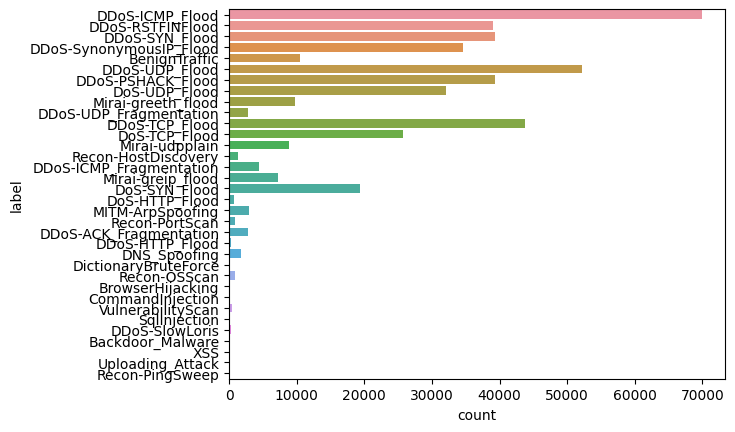

In [17]:
sns.countplot(y=train['label'])

# Classification: 2 (1+1) classes

In [18]:
dict_2classes = {}
dict_2classes['DDoS-RSTFINFlood'] = 'Attack'
dict_2classes['DDoS-PSHACK_Flood'] = 'Attack'
dict_2classes['DDoS-SYN_Flood'] = 'Attack'
dict_2classes['DDoS-UDP_Flood'] = 'Attack'
dict_2classes['DDoS-TCP_Flood'] = 'Attack'
dict_2classes['DDoS-ICMP_Flood'] = 'Attack'
dict_2classes['DDoS-SynonymousIP_Flood'] = 'Attack'
dict_2classes['DDoS-ACK_Fragmentation'] = 'Attack'
dict_2classes['DDoS-UDP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-ICMP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-SlowLoris'] = 'Attack'
dict_2classes['DDoS-HTTP_Flood'] = 'Attack'

dict_2classes['DoS-UDP_Flood'] = 'Attack'
dict_2classes['DoS-SYN_Flood'] = 'Attack'
dict_2classes['DoS-TCP_Flood'] = 'Attack'
dict_2classes['DoS-HTTP_Flood'] = 'Attack'


dict_2classes['Mirai-greeth_flood'] = 'Attack'
dict_2classes['Mirai-greip_flood'] = 'Attack'
dict_2classes['Mirai-udpplain'] = 'Attack'

dict_2classes['Recon-PingSweep'] = 'Attack'
dict_2classes['Recon-OSScan'] = 'Attack'
dict_2classes['Recon-PortScan'] = 'Attack'
dict_2classes['VulnerabilityScan'] = 'Attack'
dict_2classes['Recon-HostDiscovery'] = 'Attack'

dict_2classes['DNS_Spoofing'] = 'Attack'
dict_2classes['MITM-ArpSpoofing'] = 'Attack'

dict_2classes['BenignTraffic'] = 'Benign'

dict_2classes['BrowserHijacking'] = 'Attack'
dict_2classes['Backdoor_Malware'] = 'Attack'
dict_2classes['XSS'] = 'Attack'
dict_2classes['Uploading_Attack'] = 'Attack'
dict_2classes['SqlInjection'] = 'Attack'
dict_2classes['CommandInjection'] = 'Attack'

dict_2classes['DictionaryBruteForce'] = 'Attack'

In [19]:
labels = ["Attack","Benign"]

In [20]:
new_train = [dict_2classes[k] for k in train['label']]
train['label'] = new_train

<Axes: xlabel='label', ylabel='count'>

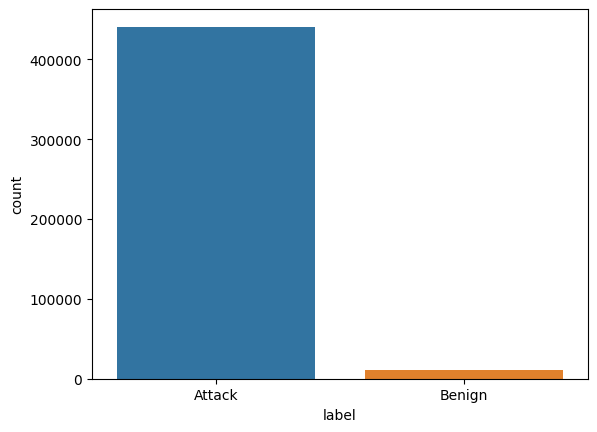

In [21]:
sns.countplot(x=train['label'])

# Label Encoding

In [22]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
# le(test)

In [23]:
# train.drop(['num_outbound_cmds'], axis=1, inplace=True)
# test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,102.2,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.0,42.0,8.315011e+07,9.5,9.165151,0.0,0.0,0.0,141.55,0
1,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334862e+07,9.5,10.392305,0.0,0.0,0.0,141.55,0
2,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,54.0,8.308927e+07,9.5,10.392305,0.0,0.0,0.0,141.55,0
3,3.394034,210.6,6.0,64.0,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336215e+07,9.5,10.392305,0.0,0.0,0.0,141.55,0
4,0.000000,54.0,6.0,64.0,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334381e+07,9.5,10.392305,0.0,0.0,0.0,141.55,0


# Feature selection

In [24]:
X_train = train.drop(['label'], axis=1)
Y_train = train['label']

In [25]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
# sel.fit(X_train, Y_train)

# with progress bar
with tqdm(total=len(X_train)) as pbar:
    sel.fit(X_train, Y_train)
    pbar.update(len(X_train))
selected_features = X_train.columns[(sel.get_support())]

selected_features

100%|██████████| 451498/451498 [02:15<00:00, 3320.20it/s]


Index(['flow_duration', 'Header_Length', 'Duration', 'Rate', 'Srate',
       'urg_count', 'rst_count', 'Max', 'IAT', 'Number', 'Variance', 'Weight'],
      dtype='object')

In [26]:
X_train = X_train[selected_features]

In [27]:
X_train

,flow_duration,Header_Length,Duration,Rate,Srate,urg_count,rst_count,Max,IAT,Number,Variance,Weight
0,0.000000,0.00,102.20,204.980158,204.980158,0.0,0.00,42.0,8.315011e+07,9.5,0.00,141.55
1,0.000000,54.00,64.00,0.000000,0.000000,0.0,0.00,54.0,8.334862e+07,9.5,0.00,141.55
2,0.000000,54.00,64.00,0.000000,0.000000,0.0,0.00,54.0,8.308927e+07,9.5,0.00,141.55
3,3.394034,210.60,64.00,1.144677,1.144677,0.0,0.00,54.0,8.336215e+07,9.5,0.00,141.55
4,0.000000,54.00,64.00,0.992022,0.992022,0.0,0.00,54.0,8.334381e+07,9.5,0.00,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,64.00,8775.835347,8775.835347,0.0,0.00,50.0,8.310664e+07,9.5,0.00,141.55
451494,4.749410,108.00,64.00,0.421105,0.421105,0.0,0.00,54.0,8.295157e+07,9.5,0.00,141.55
451495,0.006198,2.96,72.91,5.956262,5.956262,0.0,0.02,43.6,8.314935e+07,9.5,0.05,141.55
451496,0.086669,38225.00,64.00,8818.813708,8818.813708,0.0,0.00,50.0,8.310246e+07,9.5,0.00,141.55


In [28]:
Y_train

0         0
1         0
2         0
3         0
4         0
         ..
451493    0
451494    0
451495    0
451496    0
451497    0
Name: label, Length: 451498, dtype: int32

# Split and scale data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [30]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)

# # with progress bar
# with tqdm(total=len(X_train)) as pbar:
#     X_train = scale.fit_transform(X_train)
#     pbar.update(len(X_train))


x_test = scale.transform(x_test)

In [31]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(316048, 12)
(316048,)
(135450, 12)
(135450,)


In [32]:
x_train = np.expand_dims(x_train, -1)
y_train = np.expand_dims(y_train, -1)
print(np.shape(x_train))
print(np.shape(y_train))

(316048, 12, 1)
(316048, 1)


# GRU

In [33]:
import tensorflow as tf
from tensorflow import keras

model =  keras.models.Sequential()
model.add(tf.keras.layers.GRU(80, activation="tanh", return_sequences=True,  input_shape=(None, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.GRU(60, activation="tanh", return_sequences=True))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.GRU(30, activation="tanh", return_sequences=True))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.GRU(16, activation="tanh"))
model.add(tf.keras.layers.Dropout(0.05))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
optimizer = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='mae',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 80)          19920     
                                                                 
 batch_normalization (Batch  (None, None, 80)          320       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, None, 80)          0         
                                                                 
 gru_1 (GRU)                 (None, None, 60)          25560     
                                                                 
 batch_normalization_1 (Bat  (None, None, 60)          240       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, None, 60)          0

In [35]:
history1= model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=1000, epochs=100)

Epoch 1/100
317/317 [==============================] - 149s 427ms/step - loss: 0.0320 - accuracy: 0.9807 - val_loss: 0.0249 - val_accuracy: 0.9771
Epoch 2/100
317/317 [==============================] - 139s 438ms/step - loss: 0.0118 - accuracy: 0.9900 - val_loss: 0.0109 - val_accuracy: 0.9900
Epoch 3/100
317/317 [==============================] - 125s 396ms/step - loss: 0.0102 - accuracy: 0.9906 - val_loss: 0.0098 - val_accuracy: 0.9907
Epoch 4/100
317/317 [==============================] - 146s 461ms/step - loss: 0.0098 - accuracy: 0.9907 - val_loss: 0.0100 - val_accuracy: 0.9903
Epoch 5/100
317/317 [==============================] - 125s 396ms/step - loss: 0.0092 - accuracy: 0.9912 - val_loss: 0.0091 - val_accuracy: 0.9911
Epoch 6/100
317/317 [==============================] - 151s 476ms/step - loss: 0.0091 - accuracy: 0.9911 - val_loss: 0.0101 - val_accuracy: 0.9900
Epoch 7/100
317/317 [==============================] - 184s 580ms/step - loss: 0.0089 - accuracy: 0.9913 - val_loss: 0

In [36]:
model.evaluate(x=x_test, y=y_test, batch_size=8)

16932/16932 [==============================] - 120s 7ms/step - loss: 0.0077 - accuracy: 0.9923


[0.007687239442020655, 0.9923071265220642]

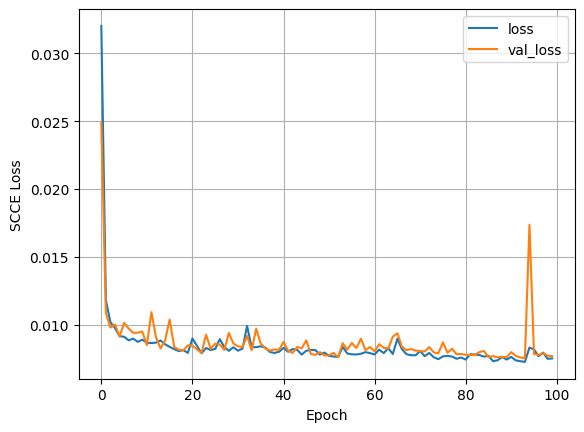

In [37]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

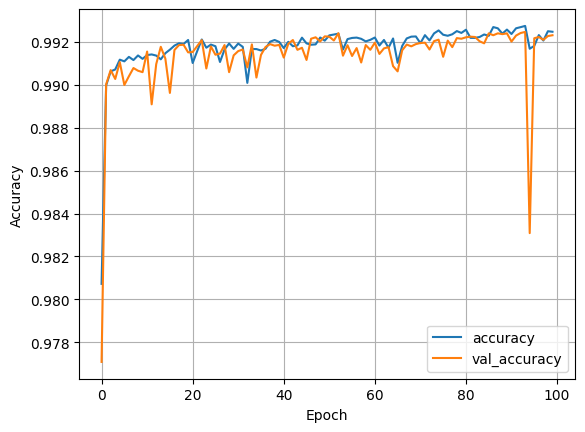

In [38]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True) 

## Training Curve

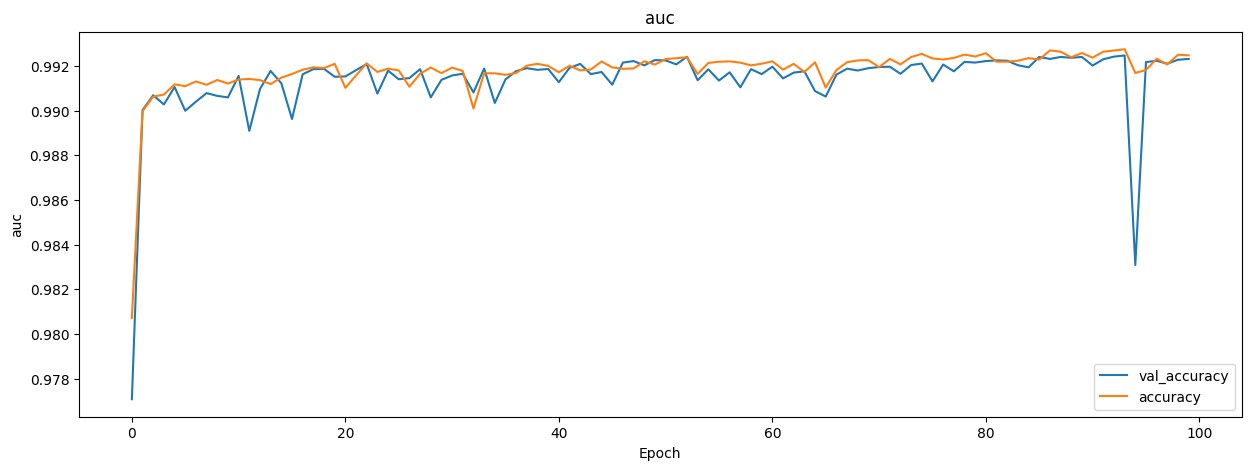

In [39]:
plt.figure(figsize=(15,5))
plt.plot(range(history1.epoch[-1]+1),history1.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history1.epoch[-1]+1),history1.history['accuracy'],label='accuracy')
plt.title('auc'); plt.xlabel('Epoch'); plt.ylabel('auc');plt.legend();
plt.show()

## Generate ROC Curve

### New Section

In [40]:
y_pred = model.predict(x_test)

print(y_pred.shape)
# for i in range (7):
#     y_pred=np.delete(y_pred,0,1)
print(y_pred.shape)
y_pred=np.squeeze(y_pred,1)
print(y_pred.shape)

4233/4233 [==============================] - 41s 9ms/step
(135450, 1)
(135450, 1)
(135450,)


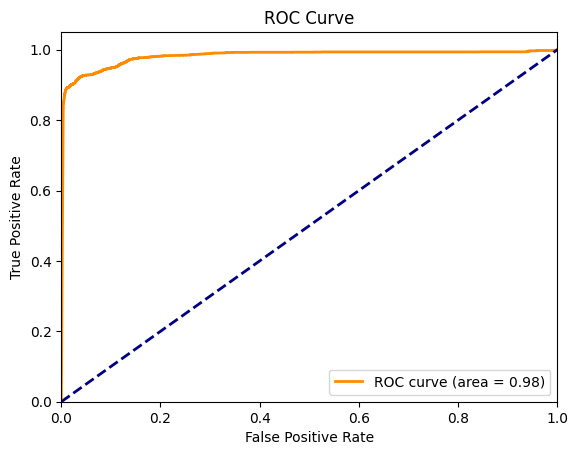

In [41]:
from sklearn.metrics import roc_curve, auc

def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

generate_results(y_test, y_pred)